# iPython notebook - Daryna analysis - Conversions by website pages


## 1. Import libraries

In [2]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options


 2. Settings

In [3]:
# Time period 24th Jan - 24th April (arbitrary )

# API credentials
# Email address 705762800217-compute@developer.gserviceaccount.com
# Key IDs 948ee8e2a420ef14a5d5a29bd35104fe2f1e6ed4
 

In [4]:
# open file. It is requested via API explorer using request parameters:

#Account: TMRW Tech Hub
#Property: TMRW
#View: All Web Site Data
#ids: ga:123303369
#start-date: 2017-01-24
#end-date: 2017-04-24

#metrics
#ga:sessions
#ga:sessionsWithEvent

#dimensions
#ga:pagePath

#sort
#-ga:sessionsWithEvent

#filter
#ga:sessions>10




In [7]:
# Open file
# original file exported from GA includes ga:pagePath,ga:sessions,ga:sessionsWithEvent
# Calculate "rate" as "Sessions with event"/"Sessions" for each page.

TMRW_events= pd.read_csv("files/tmrw_events.csv")
TMRW_events



,ga:pagePath,ga:sessions,ga:sessionsWithEvent
0,'/,4436,82
1,'/TMRW_FAQs.php,100,26
2,'/TMRW_Byte_Cafe.php,218,23
3,'/TMRW_the_team.php,99,10
4,'/trainstrikes.php,13,0
5,'/voteforbyte.php,31,0


In [9]:
TMRW_events.columns=["page","sessions","events","rate"]
TMRW_events

,page,sessions,rate
0,'/,4436,82
1,'/TMRW_FAQs.php,100,26
2,'/TMRW_Byte_Cafe.php,218,23
3,'/TMRW_the_team.php,99,10
4,'/trainstrikes.php,13,0
5,'/voteforbyte.php,31,0


In [12]:
TMRW_events_filter = TMRW_events[TMRW_events.rate > 0]
TMRW_events_filter

,page,sessions,rate
0,'/,4436,82
1,'/TMRW_FAQs.php,100,26
2,'/TMRW_Byte_Cafe.php,218,23
3,'/TMRW_the_team.php,99,10


In [13]:
TMRW_events_filter.describe()

,sessions,rate
count,4.00000,4.000000
mean,1213.25000,35.250000
std,2149.22612,31.930915
min,99.00000,10.000000
25%,99.75000,19.750000
50%,159.00000,24.500000
75%,1272.50000,40.000000
max,4436.00000,82.000000


In [27]:
#import numpy as np
from bokeh.io import output_notebook
from bokeh.charts import Bar, Line, show
from bokeh.plotting import figure, output_file, show

output_notebook()
p = Bar(TMRW_events_filter, 'page', values='rate', title="Events per page")
p.legend.location = "top_right"
# l = Bar(TMRW_events_filter, 'page', values='rate', title="Events per page")
show(p)

Loading BokehJS ...

In [17]:
TMRW_events_data = TMRW_events_filter.groupby(['page']).mean()
TMRW_events_data

,sessions,rate
page,,
'/,4436,82
'/TMRW_Byte_Cafe.php,218,23
'/TMRW_FAQs.php,100,26
'/TMRW_the_team.php,99,10


In [18]:
selected=TMRW_events_data.loc[:,"rate"]
selected

page
'/                      82
'/TMRW_Byte_Cafe.php    23
'/TMRW_FAQs.php         26
'/TMRW_the_team.php     10
Name: rate, dtype: int64

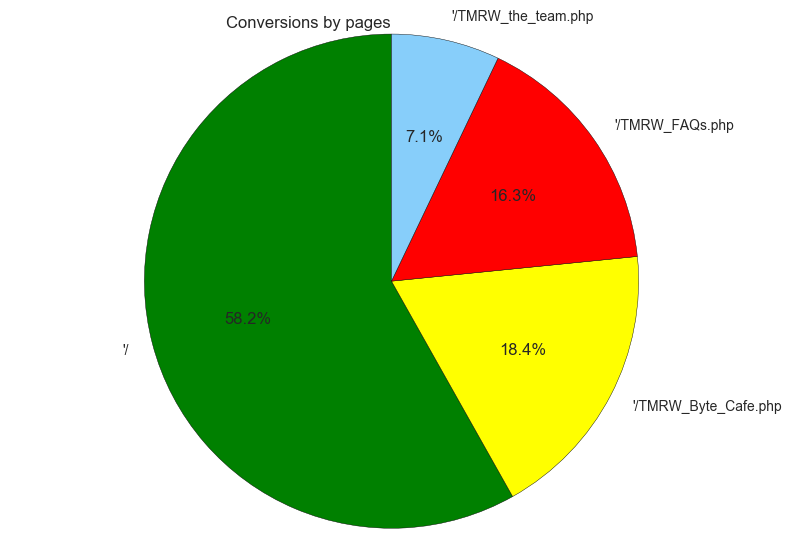

In [20]:
labels = selected.index
sizes = TMRW_events_filter['rate']
colors = ['green','yellow', 'red', 'lightskyblue']
explode = (0, 0, 0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
#plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Conversions by pages                                    ')
plt.tight_layout()
plt.show()